In [100]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler



In [101]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [102]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [103]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [105]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

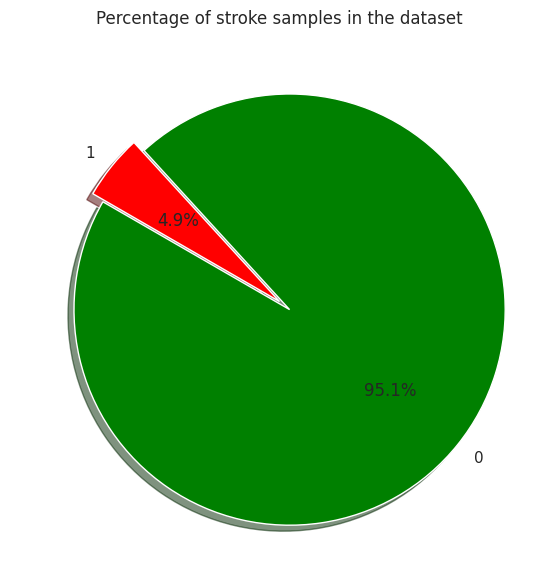

In [106]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["green","red"]
explode = (0.06,0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150,)

plt.title('Percentage of stroke samples in the dataset')
plt.show()

In [107]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [108]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

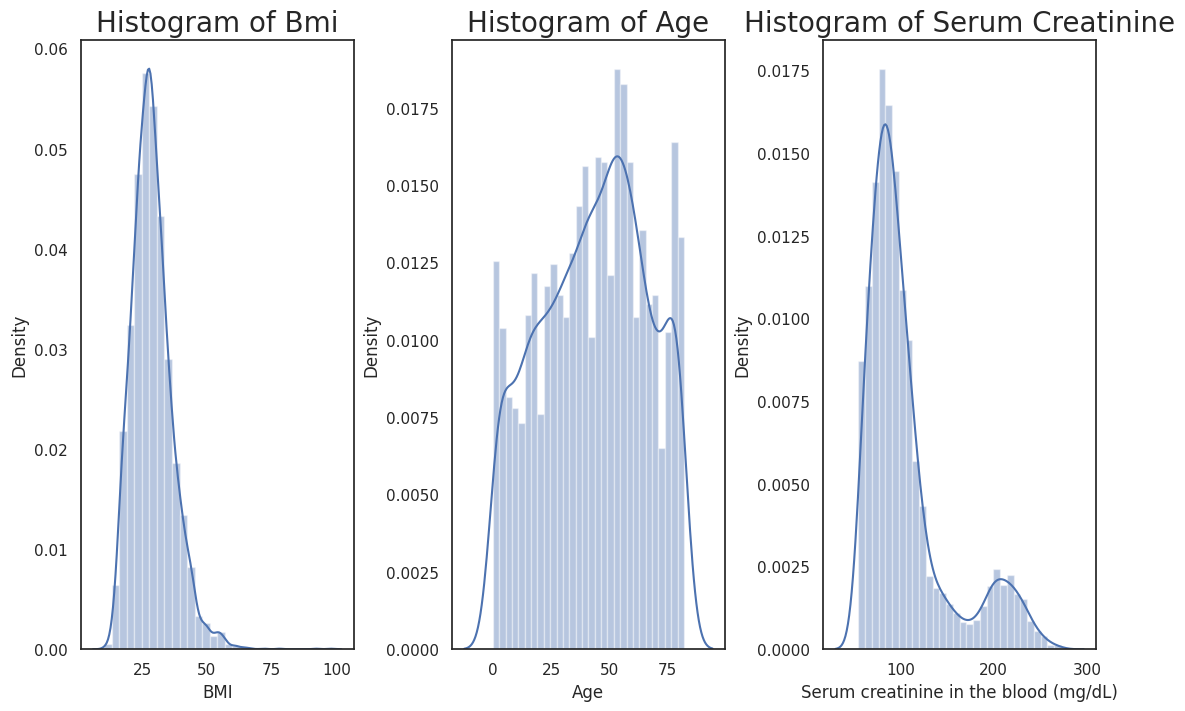

In [109]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine',
          xlabel='Serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

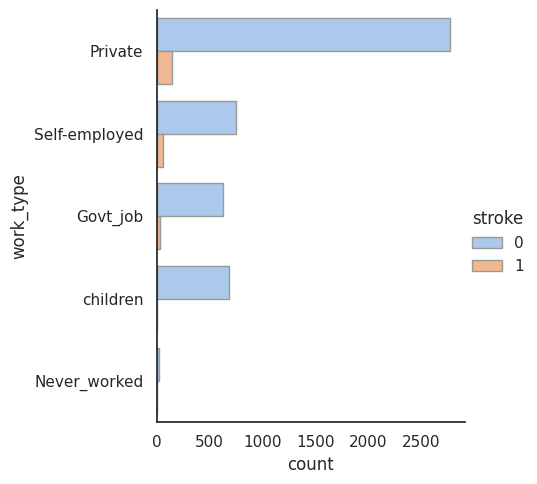

In [110]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

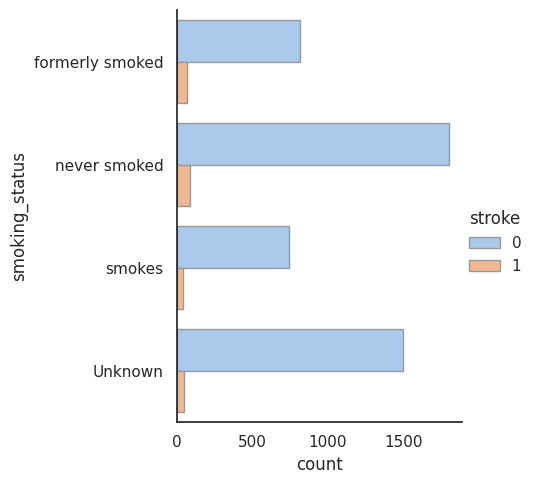

In [111]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

Feature ranking:
1. feature 1 (0.251043)
2. feature 9 (0.236288)
3. feature 8 (0.224468)
4. feature 7 (0.088237)
5. feature 5 (0.058306)
6. feature 6 (0.038568)
7. feature 0 (0.037456)
8. feature 2 (0.024916)
9. feature 3 (0.022549)
10. feature 4 (0.018169)


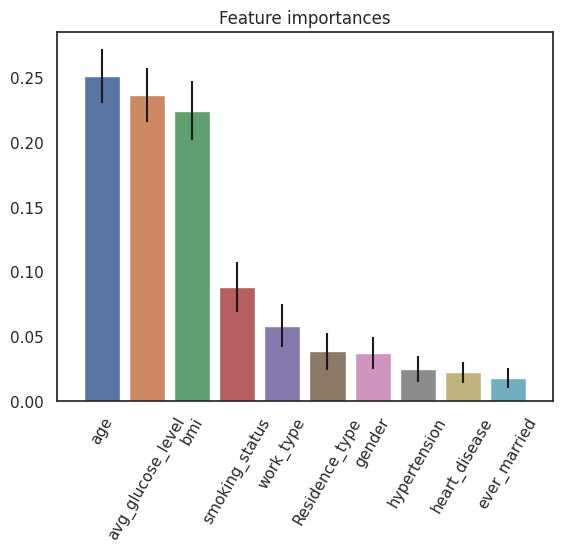

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status','bmi','avg_glucose_level']
X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

In [113]:
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)

array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 418.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [114]:
en_df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [115]:
en_df_imputed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [116]:
X , y = en_df_imputed[features],en_df_imputed["stroke"]
#x_train,x_temp,y_train,y_temp = train_test_split(X,y,test_size=0.2,random_state=23)
#x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=23)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 3894 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894


In [118]:
##sc= StandardScaler()
##X_res  = sc.fit_transform(X_res)
##x_test = sc.fit_transform(x_test)

In [119]:
X_res.shape

(7788, 10)

In [120]:
x_test.shape

(1022, 10)

In [121]:
X_res

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi,avg_glucose_level
0,1,45,0,0,0,2,1,2,305,151
1,0,84,1,0,1,2,1,3,108,2485
2,0,81,0,0,1,0,1,2,126,734
3,1,83,0,0,1,2,1,2,255,1227
4,0,37,0,0,0,2,1,0,99,3158
...,...,...,...,...,...,...,...,...,...,...
7783,0,99,0,0,1,2,0,0,118,98
7784,0,86,0,0,1,3,0,1,191,3353
7785,1,84,0,0,1,2,0,1,187,3167
7786,0,97,0,0,0,2,1,1,157,3177


In [122]:
x_test.shape

(1022, 10)

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       967
           1       0.14      0.80      0.24        55

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.54      1022
weighted avg       0.94      0.73      0.80      1022


-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.919
precision: 0.78
recall: 0.92
f1: 0.84
accuracy: 0.83


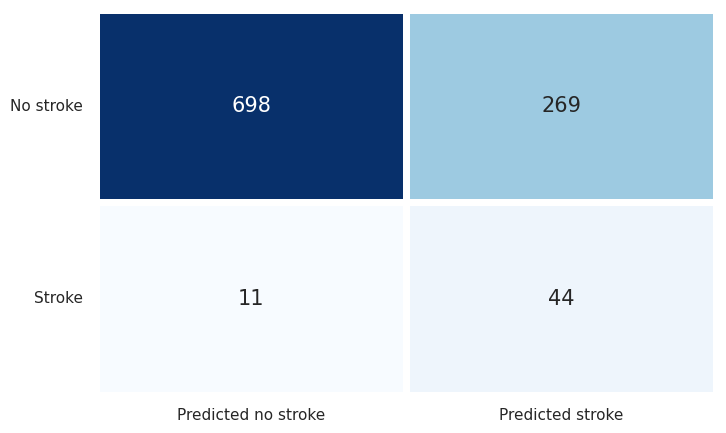

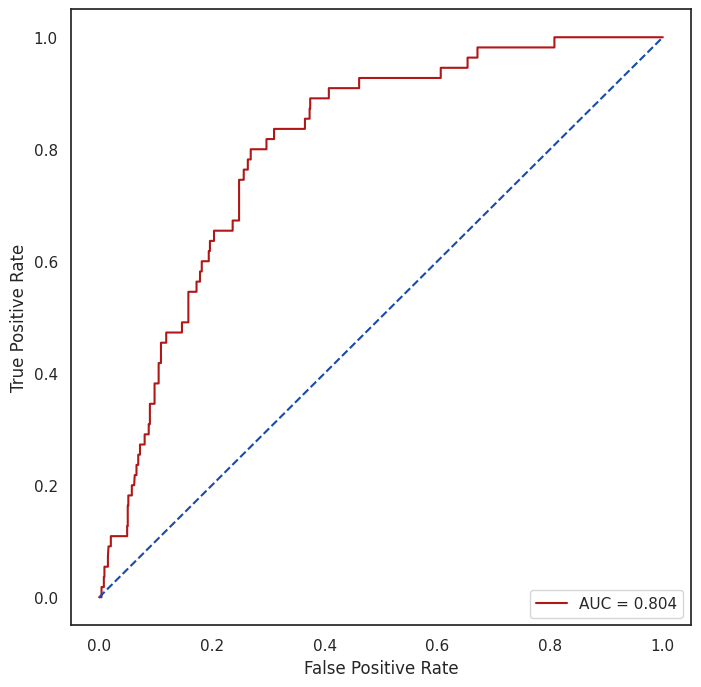

In [123]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(X_res, y_res)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:,1]

x_train_resampled = X_res
y_train_resampled = y_res

# Metrics
#results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
#results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
#results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
#results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
#print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")
print(f"accuracy: {round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy').mean(), 2)}")

#results.iloc[4, 3] = round(cross_val_score(rf, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [124]:
# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(10))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = x_train_resampled.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
1,age,0.570982
9,avg_glucose_level,0.134344
5,work_type,0.080267
8,bmi,0.070884
6,Residence_type,0.045066
0,gender,0.038088
7,smoking_status,0.034176
4,ever_married,0.018171
2,hypertension,0.004104
3,heart_disease,0.003917


              precision    recall  f1-score   support

           0       0.97      0.76      0.85       967
           1       0.13      0.64      0.22        55

    accuracy                           0.75      1022
   macro avg       0.55      0.70      0.54      1022
weighted avg       0.93      0.75      0.82      1022


-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.866
precision: 0.77
recall: 0.83
f1: 0.8
accuracy: 0.79


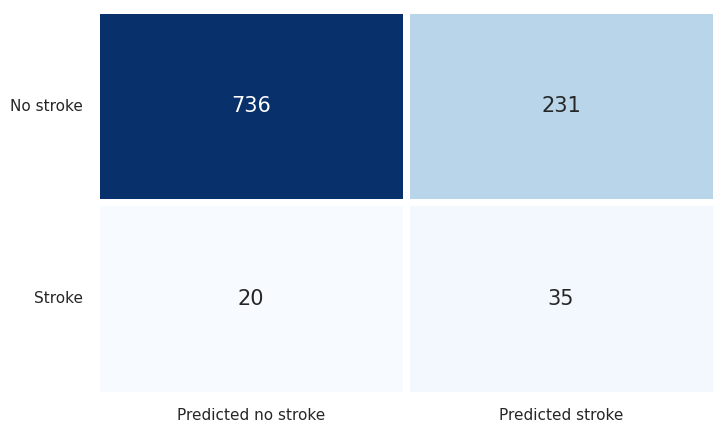

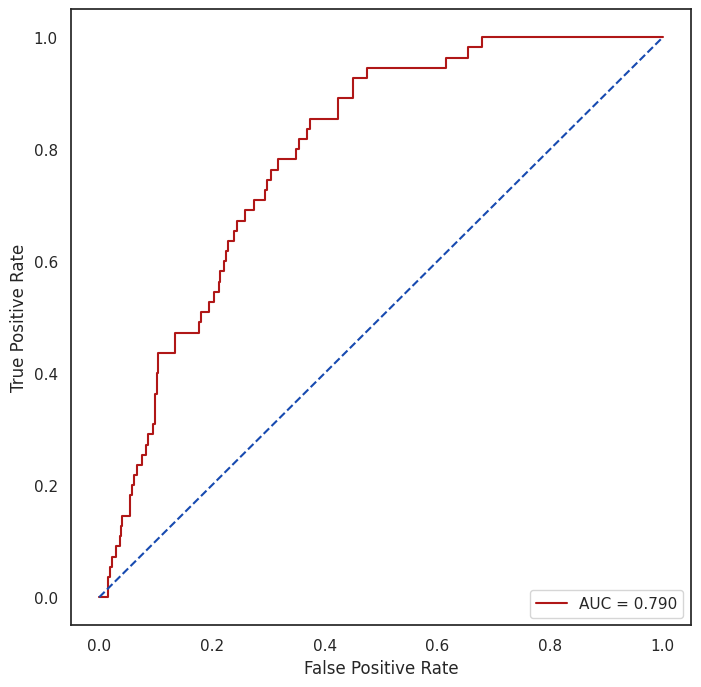

In [125]:
lg = LogisticRegression(random_state = 42)
lg.fit(x_train_resampled, y_train_resampled)
y_pred = lg.predict(x_test)
y_prob = lg.predict_proba(x_test)[:,1]
lg_cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
#print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")
print(f"accuracy: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy').mean(), 2)}")



# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


              precision    recall  f1-score   support

           0       0.97      0.74      0.84       967
           1       0.11      0.58      0.19        55

    accuracy                           0.73      1022
   macro avg       0.54      0.66      0.51      1022
weighted avg       0.92      0.73      0.80      1022


-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.757
precision: 0.71
recall: 0.57
f1: 0.63
accuracy: 0.67


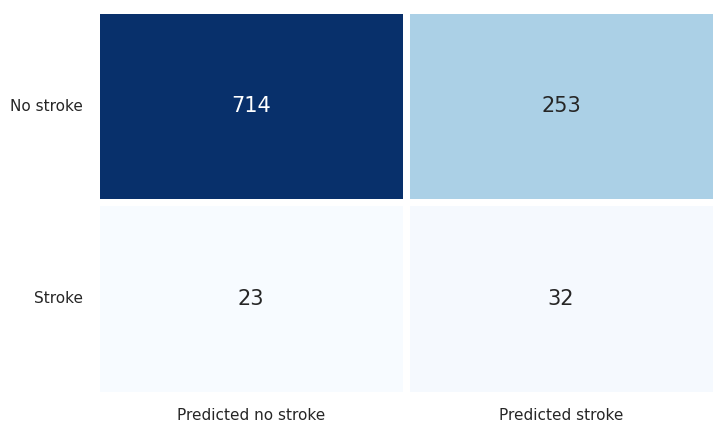

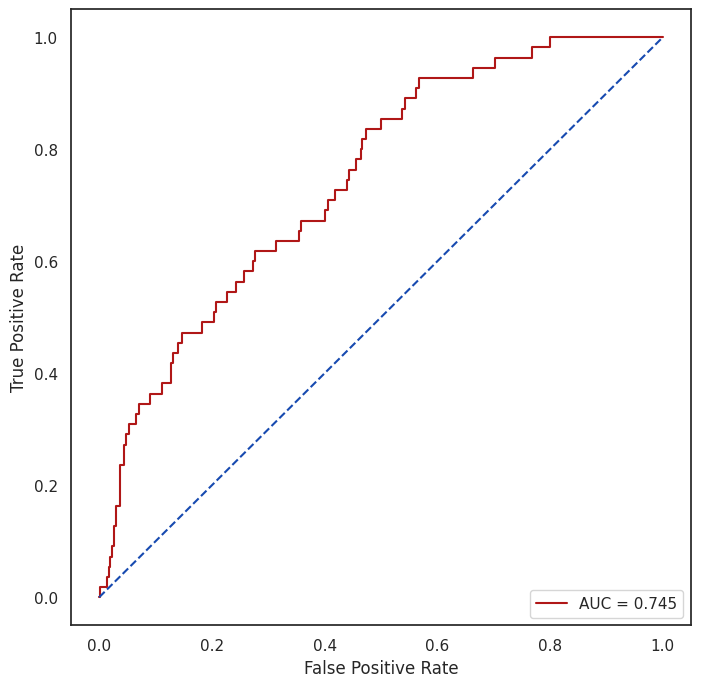

In [126]:
svc = SVC(random_state = 22, probability = True)
svc.fit(x_train_resampled, y_train_resampled)
y_pred = svc.predict(x_test)
y_prob = svc.predict_proba(x_test)[:,1]

svc_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")
print(f"accuracy: {round(cross_val_score(svc, x_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(svc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       967
           1       0.14      0.56      0.23        55

    accuracy                           0.79      1022
   macro avg       0.56      0.69      0.55      1022
weighted avg       0.93      0.79      0.85      1022


-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.946
precision: 0.83
recall: 0.92
f1: 0.88
accuracy: 0.87


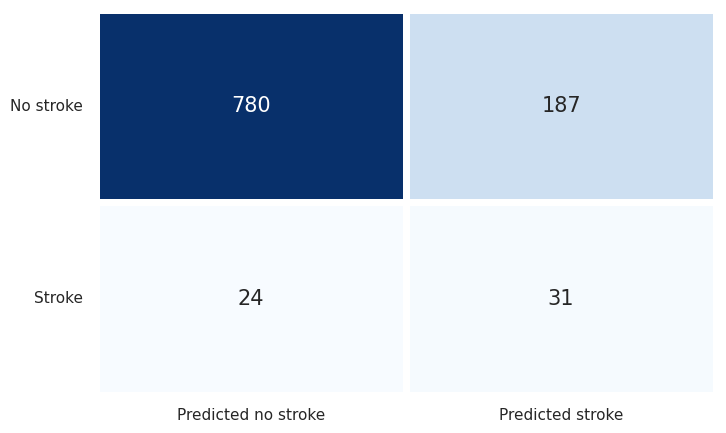

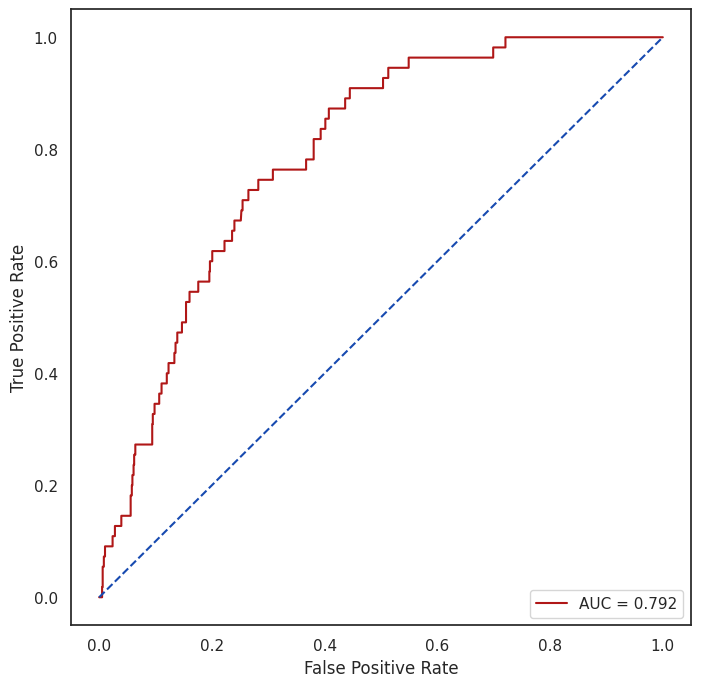

In [131]:
lg = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
lg.fit(x_train_resampled, y_train_resampled)
y_pred = lg.predict(x_test)
y_prob = lg.predict_proba(x_test)[:,1]
lg_cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
#print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'f1').mean(), 2)}")
print(f"accuracy: {round(cross_val_score(lg, x_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy').mean(), 2)}")


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
